## EDA

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

> **Images**
- width/ height ratio of each city
- smallest image of each city
- largest image of each city

In [5]:
elcerrito = pd.read_csv('./dataset/elcerrito150x100.csv')
elsobrante = pd.read_csv('./dataset/elsobrante150x100.csv')
hercules = pd.read_csv('./dataset/hercules150x100.csv')
pinole = pd.read_csv('./dataset/pinole150x100.csv')
sanpablo = pd.read_csv('./dataset/sanpablo150x100.csv')

In [7]:
cities = [elcerrito, elsobrante, hercules, pinole, sanpablo]
df = pd.concat(cities)
print(df.shape)

(1117, 45015)


In [53]:
df.columns

Index(['id', 'adress', 'bed', 'bath', 'house size', 'price', 'zip code',
       'city', 'lot size', 'price/sqft',
       ...
       'pixel44991', 'pixel44992', 'pixel44993', 'pixel44994', 'pixel44995',
       'pixel44996', 'pixel44997', 'pixel44998', 'pixel44999', 'label'],
      dtype='object', length=45015)

In [68]:
features = df.columns[:14].tolist()
features.append('label')
df_feature = df[features]
df_feature.columns

Index(['id', 'adress', 'bed', 'bath', 'house size', 'price', 'zip code',
       'city', 'lot size', 'price/sqft', 'width', 'height', 'size', 'w/h',
       'label'],
      dtype='object')

In [51]:
# minimum and maximum images od each city 
min_size = df_feature.groupby(by='city').min()['size'].values
min_width = df_feature.groupby(by='city').min()['width'].values
min_height = df_feature.groupby(by='city').min()['height'].values
max_size = df_feature.groupby(by='city').max()['size'].values
city_name = df_feature.groupby(by='city').max()['size'].index
data = {'min_size': min_size,
        'min_width': min_width,
        'min_height': min_height,
        'max_size': max_size}
pd.DataFrame(data, index=city_name).T

city,EL CERRITO,EL SOBRANTE,HERCULES,PINOLE,SAN PABLO
min_size,31684,68480,194040,127972,21735
min_width,178,320,539,428,207
min_height,178,214,360,299,105
max_size,1228800,1228800,1228800,1228800,1228800


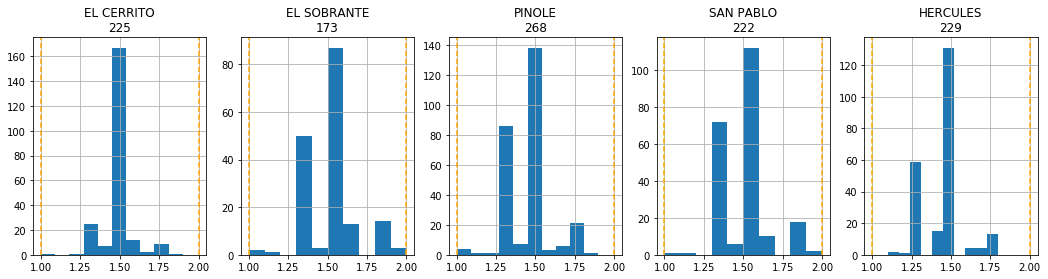

In [46]:
cities = ['EL CERRITO', 'EL SOBRANTE', 'PINOLE', 'SAN PABLO', 'HERCULES']
fig, axes = plt.subplots(ncols=5, figsize=(18,4))
for i, city in enumerate(cities):
    
    df_feature[df_feature['city'] == city]['w/h'].hist(ax=axes[i])
    axes[i].set_title(city + '\n' + str(df_feature[df_feature['city'] == city].shape[0]))
    axes[i].axvline(x=1., ls='--', c='orange')
    axes[i].axvline(x=2., ls='--', c='orange')
    

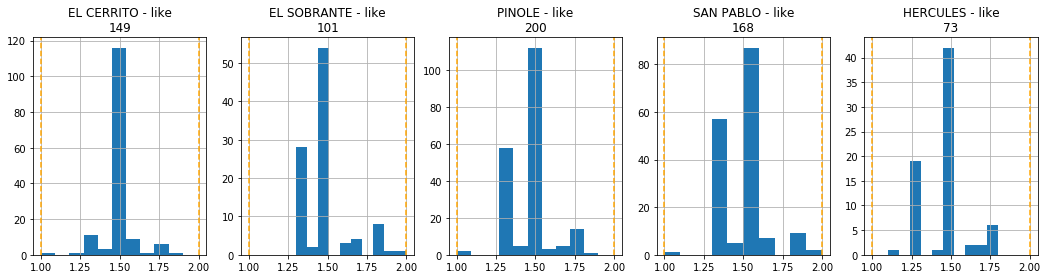

In [65]:
cities = ['EL CERRITO', 'EL SOBRANTE', 'PINOLE', 'SAN PABLO', 'HERCULES']
fig, axes = plt.subplots(ncols=5, figsize=(18,4))
for i, city in enumerate(cities):
    
    mask = (df_feature['city'] == city) & (df_feature['label'] == 1)
    df_feature[mask]['w/h'].hist(ax=axes[i])
    axes[i].set_title(city + ' - like' + '\n' + str(df_feature[mask].shape[0]))
    axes[i].axvline(x=1., ls='--', c='orange')
    axes[i].axvline(x=2., ls='--', c='orange')


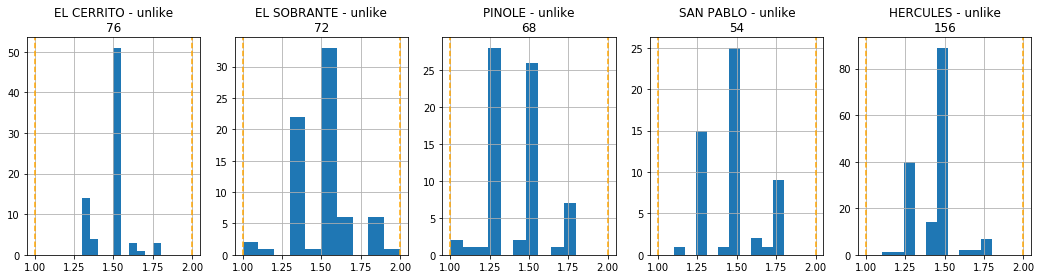

In [67]:
cities = ['EL CERRITO', 'EL SOBRANTE', 'PINOLE', 'SAN PABLO', 'HERCULES']
fig, axes = plt.subplots(ncols=5, figsize=(18,4))
for i, city in enumerate(cities):
    
    mask = (df_feature['city'] == city) & (df_feature['label'] == 0)
    df_feature[mask]['w/h'].hist(ax=axes[i])
    axes[i].set_title(city + ' - unlike' + '\n' + str(df_feature[mask].shape[0]))
    axes[i].axvline(x=1., ls='--', c='orange')
    axes[i].axvline(x=2., ls='--', c='orange')


In [47]:
house.groupby('city').mean()[['bed', 'bath', 'house size', 'lot_size1', 'price', 'price/sqft']]

,bed,bath,house size,lot_size1,price,price/sqft
city,,,,,,
EL CERRITO,3.060811,2.057432,1770.395270,6611.834459,964835.148649,599.939189
EL SOBRANTE,3.432000,2.176000,1799.904000,13069.280000,589269.592000,353.800000
HERCULES,3.459732,2.590604,1903.369128,5419.332215,606384.600671,328.583893
PINOLE,3.370370,2.195286,1631.639731,10184.101010,580262.225589,368.872054
SAN PABLO,3.221843,1.928328,1361.600683,6108.457338,484085.733788,374.283276


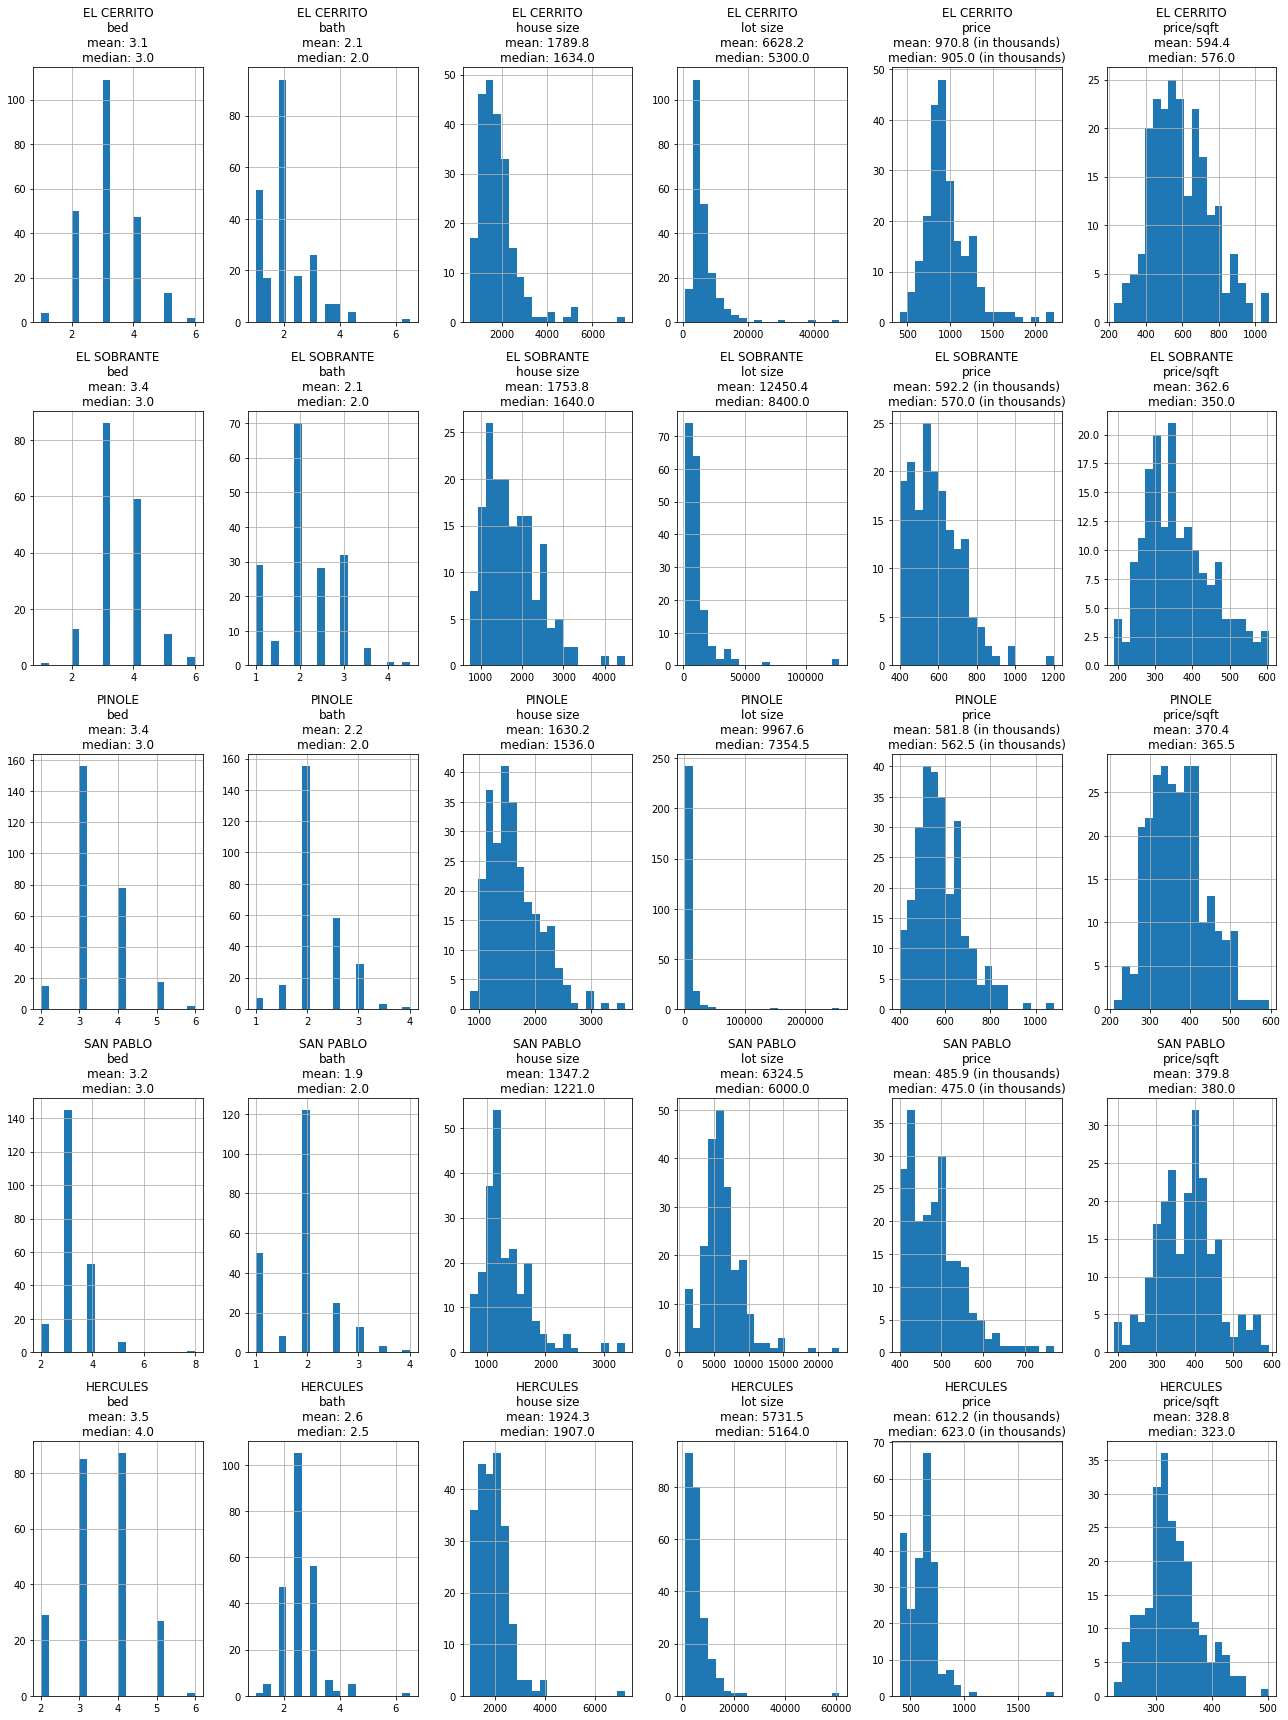

In [69]:
features = ['bed', 'bath', 'house size', 'lot size', 'price', 'price/sqft']

fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18,24))
for i, city in enumerate(['EL CERRITO', 'EL SOBRANTE', 'PINOLE', 'SAN PABLO', 'HERCULES']):
    for j, column in enumerate(features):
        if column in ['price']:
            (df_feature[df_feature['city'] == city][column]/1000).hist(ax=axes[i,j], bins=20)
            mean = df_feature[df_feature['city'] == city][column].mean()/1000
            median = df_feature[df_feature['city'] == city][column].median()/1000
            title_mean = 'mean: ' + str(round(mean,1)) + ' (in thousands)'
            title_median = 'median: ' + str(round(median,1)) + ' (in thousands)'
        
        else:
            df_feature[df_feature['city'] == city][column].hist(ax=axes[i,j], bins=20)
            mean = df_feature[df_feature['city'] == city][column].mean()
            median = df_feature[df_feature['city'] == city][column].median()
            title_mean = 'mean: ' + str(round(mean,1))
            title_median = 'median: ' + str(round(median,1))
        
        axes[i,j].set_title(city + '\n' + column + '\n' + title_mean + '\n' + title_median)
        plt.tight_layout()
            

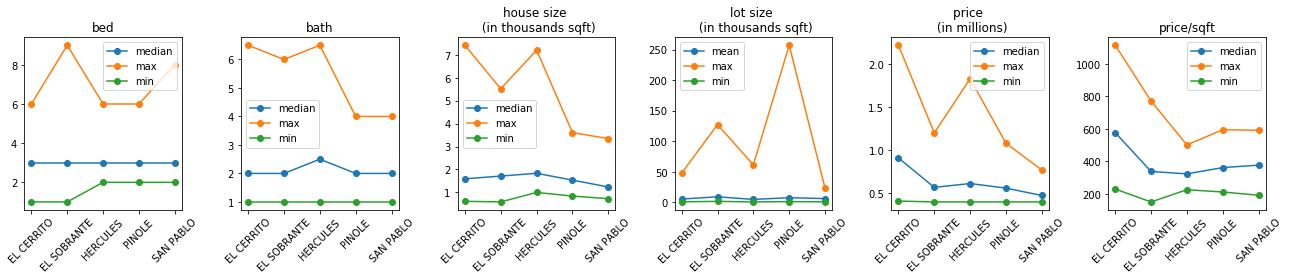

In [144]:
fig, axes = plt.subplots(ncols=6, figsize=(18,4))
for i, col in enumerate(['bed', 'bath', 'house size', 'lot_size1', 'price', 'price/sqft']):
    if col in ['bed', 'bath']:
        axes[i].plot(house.groupby('city').median()[col], marker = 'o')
        axes[i].plot(house.groupby('city').max()[col], marker = 'o')
        axes[i].plot(house.groupby('city').min()[col], marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col)
        axes[i].legend(['median', 'max', 'min'])
    elif col in ['house size']:
        axes[i].plot(house.groupby('city').median()[col]/1000, marker = 'o')
        axes[i].plot(house.groupby('city').max()[col]/1000, marker = 'o')
        axes[i].plot(house.groupby('city').min()[col]/1000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col + ' \n (in thousands sqft)')
        axes[i].legend(['median', 'max', 'min'])
    elif col in ['lot_size1']:
        axes[i].plot(house.groupby('city').median()[col]/1000, marker = 'o')
        axes[i].plot(house.groupby('city').max()[col]/1000, marker = 'o')
        axes[i].plot(house.groupby('city').min()[col]/1000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title('lot size \n (in thousands sqft)')
        axes[i].legend(['mean', 'max', 'min'])            
    elif col in ['price']:
        axes[i].plot(house.groupby('city').median()[col]/1000000, marker = 'o')
        axes[i].plot(house.groupby('city').max()[col]/1000000, marker = 'o')
        axes[i].plot(house.groupby('city').min()[col]/1000000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col + ' \n (in millions)')
        axes[i].legend(['median', 'max', 'min'])    
    elif col in ['price/sqft']:
        axes[i].plot(house.groupby('city').median()[col], marker = 'o')
        axes[i].plot(house.groupby('city').max()[col], marker = 'o')
        axes[i].plot(house.groupby('city').min()[col], marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col)
        axes[i].legend(['median', 'max', 'min'])
    plt.tight_layout();

        

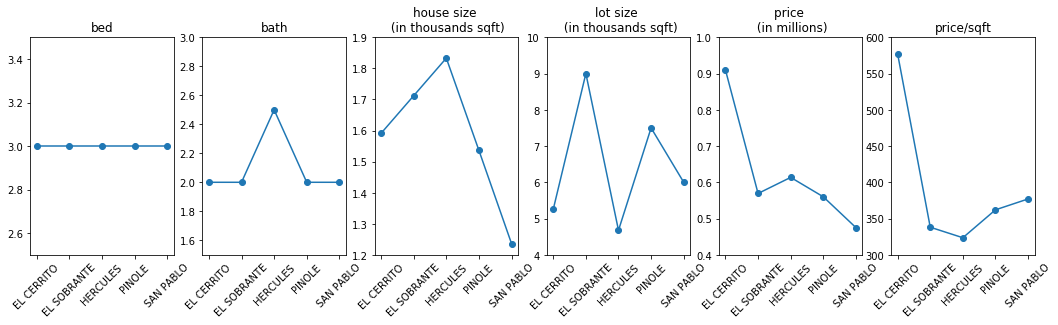

In [168]:
fig, axes = plt.subplots(ncols=6, figsize=(18,4))
for i, col in enumerate(['bed', 'bath', 'house size', 'lot_size1', 'price', 'price/sqft']):
    if col in ['bed']:
        axes[i].plot(house.groupby('city').median()[col], marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE'], marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col)
        axes[i].set_ylim(2.5, 3.5)
    elif col in ['bath']:
        axes[i].plot(house.groupby('city').median()[col], marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE'], marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col)
        axes[i].set_ylim(1.5, 3)
    elif col in ['house size']:
        axes[i].plot(house.groupby('city').median()[col]/1000, marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE']/1000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col + ' \n (in thousands sqft)')
        axes[i].set_ylim(1.2, 1.9)
    elif col in ['lot_size1']:
        axes[i].plot(house.groupby('city').median()[col]/1000, marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE']/1000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title('lot size \n (in thousands sqft)')
        axes[i].set_ylim(4, 10)
    elif col in ['price']:
        axes[i].plot(house.groupby('city').median()[col]/1000000, marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE']/1000000, marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col + ' \n (in millions)')
        axes[i].set_ylim(.4, 1)
    elif col in ['price/sqft']:
        axes[i].plot(house.groupby('city').median()[col], marker = 'o')
        #axes[i].plot(3,house.groupby('city').median()[col]['PINOLE'], marker = 'o')
        axes[i].set_xticklabels(house.groupby('city').mean().index, rotation=45)
        axes[i].set_title(col)
        axes[i].set_ylim(300, 600);
        

In [167]:
# source: https://www.census.gov/
# from 2012 - 2016
    
population = {
    'EL CERRITO': 25515,  # July 1, 2017
    'EL SOBRANTE': 12723, # April 1, 2010
    'PINOLE': 19364,      # July 1, 2017
    'SAN PABLO': 31156,   # July 1, 2017
    'HERCULES': 25545     # July 1, 2017
    
}

# owner-occupied housing unit rate, 2012 - 2016

rate = {
    'EL CERRITO': 59.8,  
    'EL SOBRANTE': 88.8, 
    'PINOLE': 69.6,      
    'SAN PABLO': 37.8,   
    'HERCULES': 78.9     
}

# median value of owner-occupied unit, 2012 - 2016

value = {
    'EL CERRITO': 636600,  
    'EL SOBRANTE': 449100, 
    'PINOLE': 387500,      
    'SAN PABLO': 221400,   
    'HERCULES': 422200
}

# median household income, 2012 - 2016

income = {
    'EL CERRITO': 92670,  
    'EL SOBRANTE': 106219, 
    'PINOLE': 74124,      
    'SAN PABLO': 45503,   
    'HERCULES': 103044
}

data = [population, rate, value, income]
index = [
    'population', 
    'owner-occupied housing unit rate', 
    'median value of owner-occupied unit', 
    'median household income'
]
aa = pd.DataFrame(data=data, index=index)
aa

,EL CERRITO,EL SOBRANTE,HERCULES,PINOLE,SAN PABLO
population,25515.0,12723.0,25545.0,19364.0,31156.0
owner-occupied housing unit rate,59.8,88.8,78.9,69.6,37.8
median value of owner-occupied unit,636600.0,449100.0,422200.0,387500.0,221400.0
median household income,92670.0,106219.0,103044.0,74124.0,45503.0


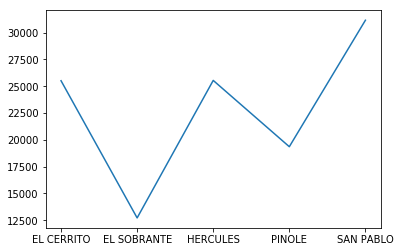

In [165]:
plt.plot(aa.iloc[0])